# Linear Regression: A Brief Introduction

Suppose you are given the data in the picture below and asked to draw a straight line that you feel best describes the relationship between the square footage of a house (on the x-axis) and its price (on the y-axis). What might that line look like? Seriously, pause for a moment and imagine a line on that graph. What would it look like?

[figure with point cloud in approximate line]


Most of us would probably end up drawing a line that looks something like the line in the figure below. And that, in a basic sense, is precisely what we are trying to do with linear regression: use mathematics to estimate a "line of best fit" that (we hope) gives a pretty good summary of the relationship between different variables.

[figure with red line]

But how exactly does linear regression do this? Odds are, you probably aren't even quite sure what guided you to think about a line very similar to the red one in the figure above — you just followed your intuition. But the basic idea that probably guided how you drew the line in your head is very similar to the principle used by a linear regression: try to draw a line that, on average, is as close as possible to all the data points plotted.

To be more specific, a linear regression estimates the line that minimizes the sum of squared errors between the line of best fit and each data point. Indeed, linear regression is often called "Ordinary Least Squares" or "Least Squares Regression" precisely because it tries to find the line that minimizes (gives rise to the smallest or least) sum of squared errors. There are reasons that linear regression minimizes the sum of *squared* errors (instead of just the sum of errors), but those reasons aren't crucial to getting an intuitive sense of how linear regression works.



## Representing A Regression Line

While this kind of picture is the easiest way to visualize a simple regression, this is not how most regressions are presented for reasons we'll discuss below. Instead, regressions generally take advantage of the fact that a line can be represented with an intercept (where the line crosses the y-axis) and a slope (the amount the line rises when you move one unit along the x-axis). In math notation, this generally gets written something like:

$$\text{price} = \alpha + \beta * \text{square footage} + \epsilon$$

The variable we're trying to explain (here, price) is on the left-hand side of the equation, and we write that the price of a house is equal to a constant term (the intercept, the value of $\alpha$) plus the houses square footage times the slope of the line of best fit ($\beta$). The last term — $\epsilon$ — is the error associated with a given observation (the difference between the value of the line of best fit for a given house and the house's true price). Mathematically, it works out that the sum of all the error terms ($\epsilon$) from a regression will always add up to zero.

So suppose we ran a regression, and the regression model estimated that $\alpha = -43,000$ and $\beta = 280$. From this, we could conclude that the model's estimate is that a 1,500 square foot house would have a price of 377,000 US Dollars. 

From this model, we could also infer that if someone owned a 1,500 square foot house and was thinking of building an extension that would add 500 square feet to the house, then the model's best guess would be that the price of the house would increase by $500 * \beta = 97,000$.

While the equation above shows us how regressions are often written out in books or papers, that's not quite how regression models are presented in Python. In Python, the result of a regression will appear in a table with a lot of diagnostic statistics that can look quite intimidating at first (and many of which you don't need to worry about). To illustrate, let's use the Kings County dataset we used last week and regress the price of a home on its square footage. Don't worry about the code — we'll cover the syntax being used here in a later reading — just take a look at the output that follows. 

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option("mode.copy_on_write", True)

home_prices = pd.read_csv("data/kc_house_data.csv")
price_and_footage_reg = smf.ols("price ~ sqft_living", data=home_prices).fit()
price_and_footage_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sat, 20 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:44:15   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2]:
home_prices.sample().T

,14427
id,6413600276
date,20150324T000000
price,354950.0
bedrooms,3
bathrooms,1.0
sqft_living,970
sqft_lot,5922
floors,1.5
waterfront,0
view,0


Now, there's a lot in this table, but the *main* think to look at in the model are these two numbers:

![Bivariate Regression with Coefficients Flagged](img/bivariate_regression_table.png)

These are the estimates from the regression of the intercept ($\alpha$ above) and the slope of our line of best fit ($\beta$). These parameters of the model are generally referred to as *coefficients*, which is why the header above these numbers is `coef`. From this table, we can see that our model has an intercept of about -43,000 and a slope of 280.

All of the other terms in this table are statistics that can be used to evaluate the statistical properties of the model — is it fitting the data well, how much is square footage contributing to price, etc. Most of these are important to understand in practice, but are beyond the scope of this introductory reading. 

If I plot the prices this model would predict for each home in our dataset in red (and plot it over the real data points in blue), you can see that we do indeed have what looks like a reasonable line of best fit (similar to what we see in the figure above). We can also see that the red line has a slope of about 280 — this isn't immediately obvious because each tick on the y-axis is 1,000,000 units (note the 1e6 at the top), while each tick on the x-axis is only 2,000, but if you pick a few points and to the math it works out. 

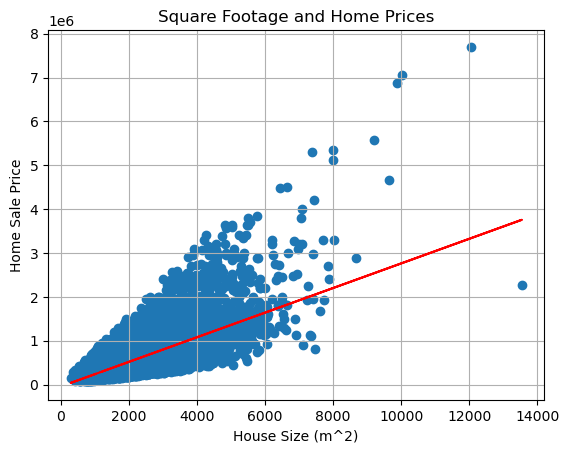

In [3]:
# Get home prices predicted by the model
predicted_price = price_and_footage_reg.predict(home_prices["sqft_living"])

# Plot predicted home prices
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(home_prices["sqft_living"], home_prices["price"])
ax.plot(home_prices["sqft_living"], predicted_price, color="red")
ax.set_title("Square Footage and Home Prices")
ax.set_xlabel("House Size (m^2)")
ax.set_ylabel("Home Sale Price")
ax.grid(True)

It's common for people new to regression to look at the intercept (here, -43,000 dollars) and say that's nuts — no house has a negative price. However, there are also no houses with 0 square footage, which means there are no actual houses at 0 or even too close to that point. Given that, the intercept in a regression like this is generally not something we interpret — it just provides the model with an extra parameter the model can use to best fit the data.

## Multivariate Regression

Up until now, we've only looked at regressions in the context of two variables: one we're trying to understand (the "dependent variable") and one we think helps to explain variation in the first (our "explanatory variable"). But this doesn't really tell the whole story of linear regression. Indeed, what makes linear regressions powerful is not their ability to model the relationship between two variables but between a single dependent variable and an arbitrary number of explanatory variables that we think *jointly and simultaneously* explain the variation we observe in the dependent variable. For that reason, linear regression is also often called "multiple regression."

To illustrate, consider the example of home prices — while it's true that square footage is a major factor in a home's value, it's obviously not the only factor. In our dataset, we also have a variable called `condition`, which rates the condition of the house. Homes in desperate need of repairs have low `condition` values (the lowest value is a `1`), while homes in like-new condition have high values (up to `5`).

With a multivariate regression, we can model home prices taking into account *both* the size of a home *and* its condition simultaneously:


In [4]:
price_sqft_and_condition_reg = smf.ols(
    "price ~ sqft_living + condition", data=home_prices
).fit()
price_sqft_and_condition_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 1.076e+04
Date:                Sat, 20 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:44:16   Log-Likelihood:            -3.0014e+05
No. Observations:               21613   AIC:                         6.003e+05
Df Residuals:                   21610   BIC:                         6.003e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.972e+05   1.05e+04    -18.829      0.000   -2.18e+05   -1.77e+05
sqft_living   282.4525      1.928    146.485      0.000     278.673     286.232
condition    4.394e+04   2721.410     16.144      0.000    3.86e+04    4.93e+04
==============================================================================
Omnibus:                    14863.109   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           557323.673
Skew:                           2.826   Prob(JB):                         0.00
Kurtosis:                      27.227   Cond. No.                     1.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can see, the coefficient on `condition` is about 43,000, meaning that the model predicts that a one-point increase in a home's `condition` score (from a `1` to a `2`, or a `3` to a `4`, for example) would increase the value of the home by about 43,000 dollars. 

### A Line of Best Fit in Higher Dimensions

How did it come by this number? The intuition for a multivariate regression remains the same as the intuition we developed when we only had one explanatory variable above — the model is picking parameters to minimize the sum of squared errors (the difference between the value the model predicts for our dependent variable, `price`, and the true value for each home in the data). With multivariate regressions, however, this relationship becomes harder to imagine because we are effectively working in higher dimensions. With two explanatory variables, for example, we're trying to draw a plane of best fit in a three-dimensional space (two explanatory variables plus the dependent variable). This is harder to picture — though not impossible, as illustrated below, which shows square footage on the x-axis, condition on the y-axis, and price on the z-axis (again, don't stress the code!). The blue points are a 3D scatter plot of the raw data, and the red wireframe plane represents the prices predicted by our regression at each x-y combination:

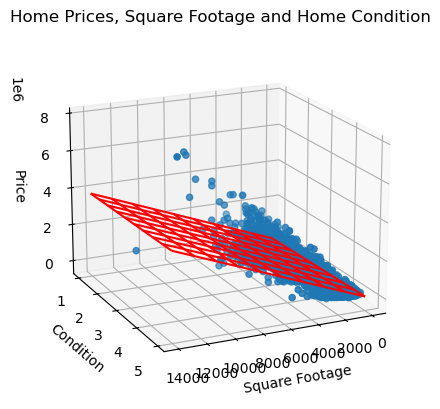

In [5]:
# First actual data as a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(
    home_prices["sqft_living"],
    home_prices["condition"],
    home_prices["price"],
)
ax.set_xlabel("Square Footage")
ax.set_ylabel("Condition")
ax.set_zlabel("Price")
ax.set_title("Home Prices, Square Footage and Home Condition")
# Build a mesh of x-y points.
STEPS = 10
grid = pd.DataFrame(
    {
        "sqft_living": np.linspace(0, 14_000, STEPS),
        "condition": np.linspace(1, 5, STEPS),
    }
)

X_mesh, Y_mesh = np.meshgrid(grid["sqft_living"], grid["condition"])
coefs = price_sqft_and_condition_reg.params

# Calculated Predicted Values for each x-y point
Z = coefs["Intercept"] + X_mesh * coefs["sqft_living"] + Y_mesh * coefs["condition"]
ax.view_init(elev=18, azim=65)
ax.plot_wireframe(X_mesh, Y_mesh, Z, color="red")

The logic is also the same for even more regressors, but visualization goes from "hard" to basically impossible, so you'll just have to trust me at that point!

## Want to Learn More?

Great! Our colleague from the statistics department — Mine Çetinkaya-Rundel — has developed an entire course on linear regression and modeling that we think is terrific (and judging by the ratings the course has received, past students do too!). You can check it out here: [Linear Regression and Modeling](https://www.coursera.org/learn/linear-regression-model). The course uses R when they do actual coding, but the focus of the class is on how linear regression works and how results can be interpreted, which is the same whether you're using R, Python, or doing the matrix algebra on a napkin.